## Smoothing

In [1]:
import sys
path = "../../benchmark/third_party/bench-mr/python"
if path not in sys.path:
    sys.path.append(path)

import os
os.environ["MPB_BINARY"] = "./benchmark"
os.environ["MPB_PYTHON_BINARY"] = "../../../../scripts/run_smoothing.py"
os.environ["MPB_BINARY_DIR"] = "../../benchmark/third_party/bench-mr/bin"
os.environ["PYTHONPATH"] = "../../../../build/benchmark"


import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
# make sure to not use Level-3 fonts
mpl.rcParams['pdf.fonttype'] = 42

from plot_env import plot_env
import json
from plot_env import plot_env, plot_env_options
from plot_trajectory import plot_trajectory, plot_nodes, plot_trajectory_options
from color import get_color, get_colors
import matplotlib.pyplot as plt
from mpb import MPB, MultipleMPB
from plot_stats import plot_planner_stats

%config InlineBackend.figure_format='retina'
%load_ext autoreload
%autoreload 2

### RUN initial Planner

In [2]:
m = MPB()

scenario = (
    {"theta": -1.58, "x": 7.5, "y": -10},
    {"theta": -1.58, "x": 116, "y": -70},
    "warehouse2",
    "polygon_mazes/warehouse_robot.svg",
)

m = MPB()
m["env.start"] = scenario[0]
m["env.goal"] = scenario[1]
m["env.type"] = "polygon"
m["env.polygon.source"] = "polygon_mazes/%s.svg" % scenario[2]
m["env.collision.robot_shape_source"] = scenario[3]


m["max_planning_time"] = 60

m.set_planners(['rrt'])
m["benchmark.smoothing"]["constrained_onf_smoother"] = True
m.set_smoothers(['constrained_onf_smoother', 'ompl_bspline', 'ompl_shortcut', 'ompl_simplify_max', 'grips', 'chomp'])
# m.set_steer_functions(['reeds_shepp'])
m.run(id="onf_smoother", runs=5)
m.run_custom_smoother()

Running MPB with ID onf_smoother (log file at onf_smoother.log)...


onf_smoother:   0%|          | 0/5 [00:00<?, ?it/s]

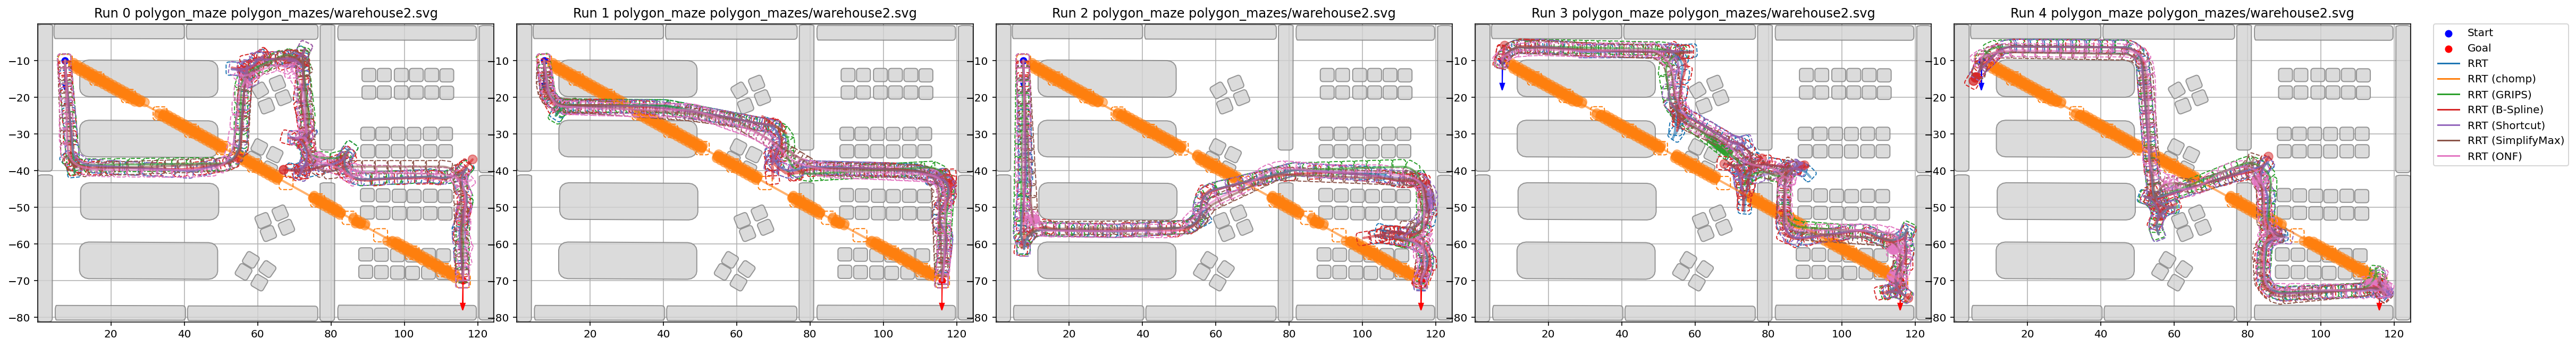

In [4]:
m.visualize_trajectories(draw_start_goal_thetas=True,
                         plot_every_nth_polygon=8,
                         fig_width=8,
                         fig_height=8,
                         silence=True,
                         save_file="plots/onf_smoother1.pdf",
                         num_colors=10,
                         show_smoother=True);

/home/student/.local/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/student/.local/lib/python3.9/site-packages/matplotlib/axes/_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


Saved plots/onf_smoother_stats.pdf.


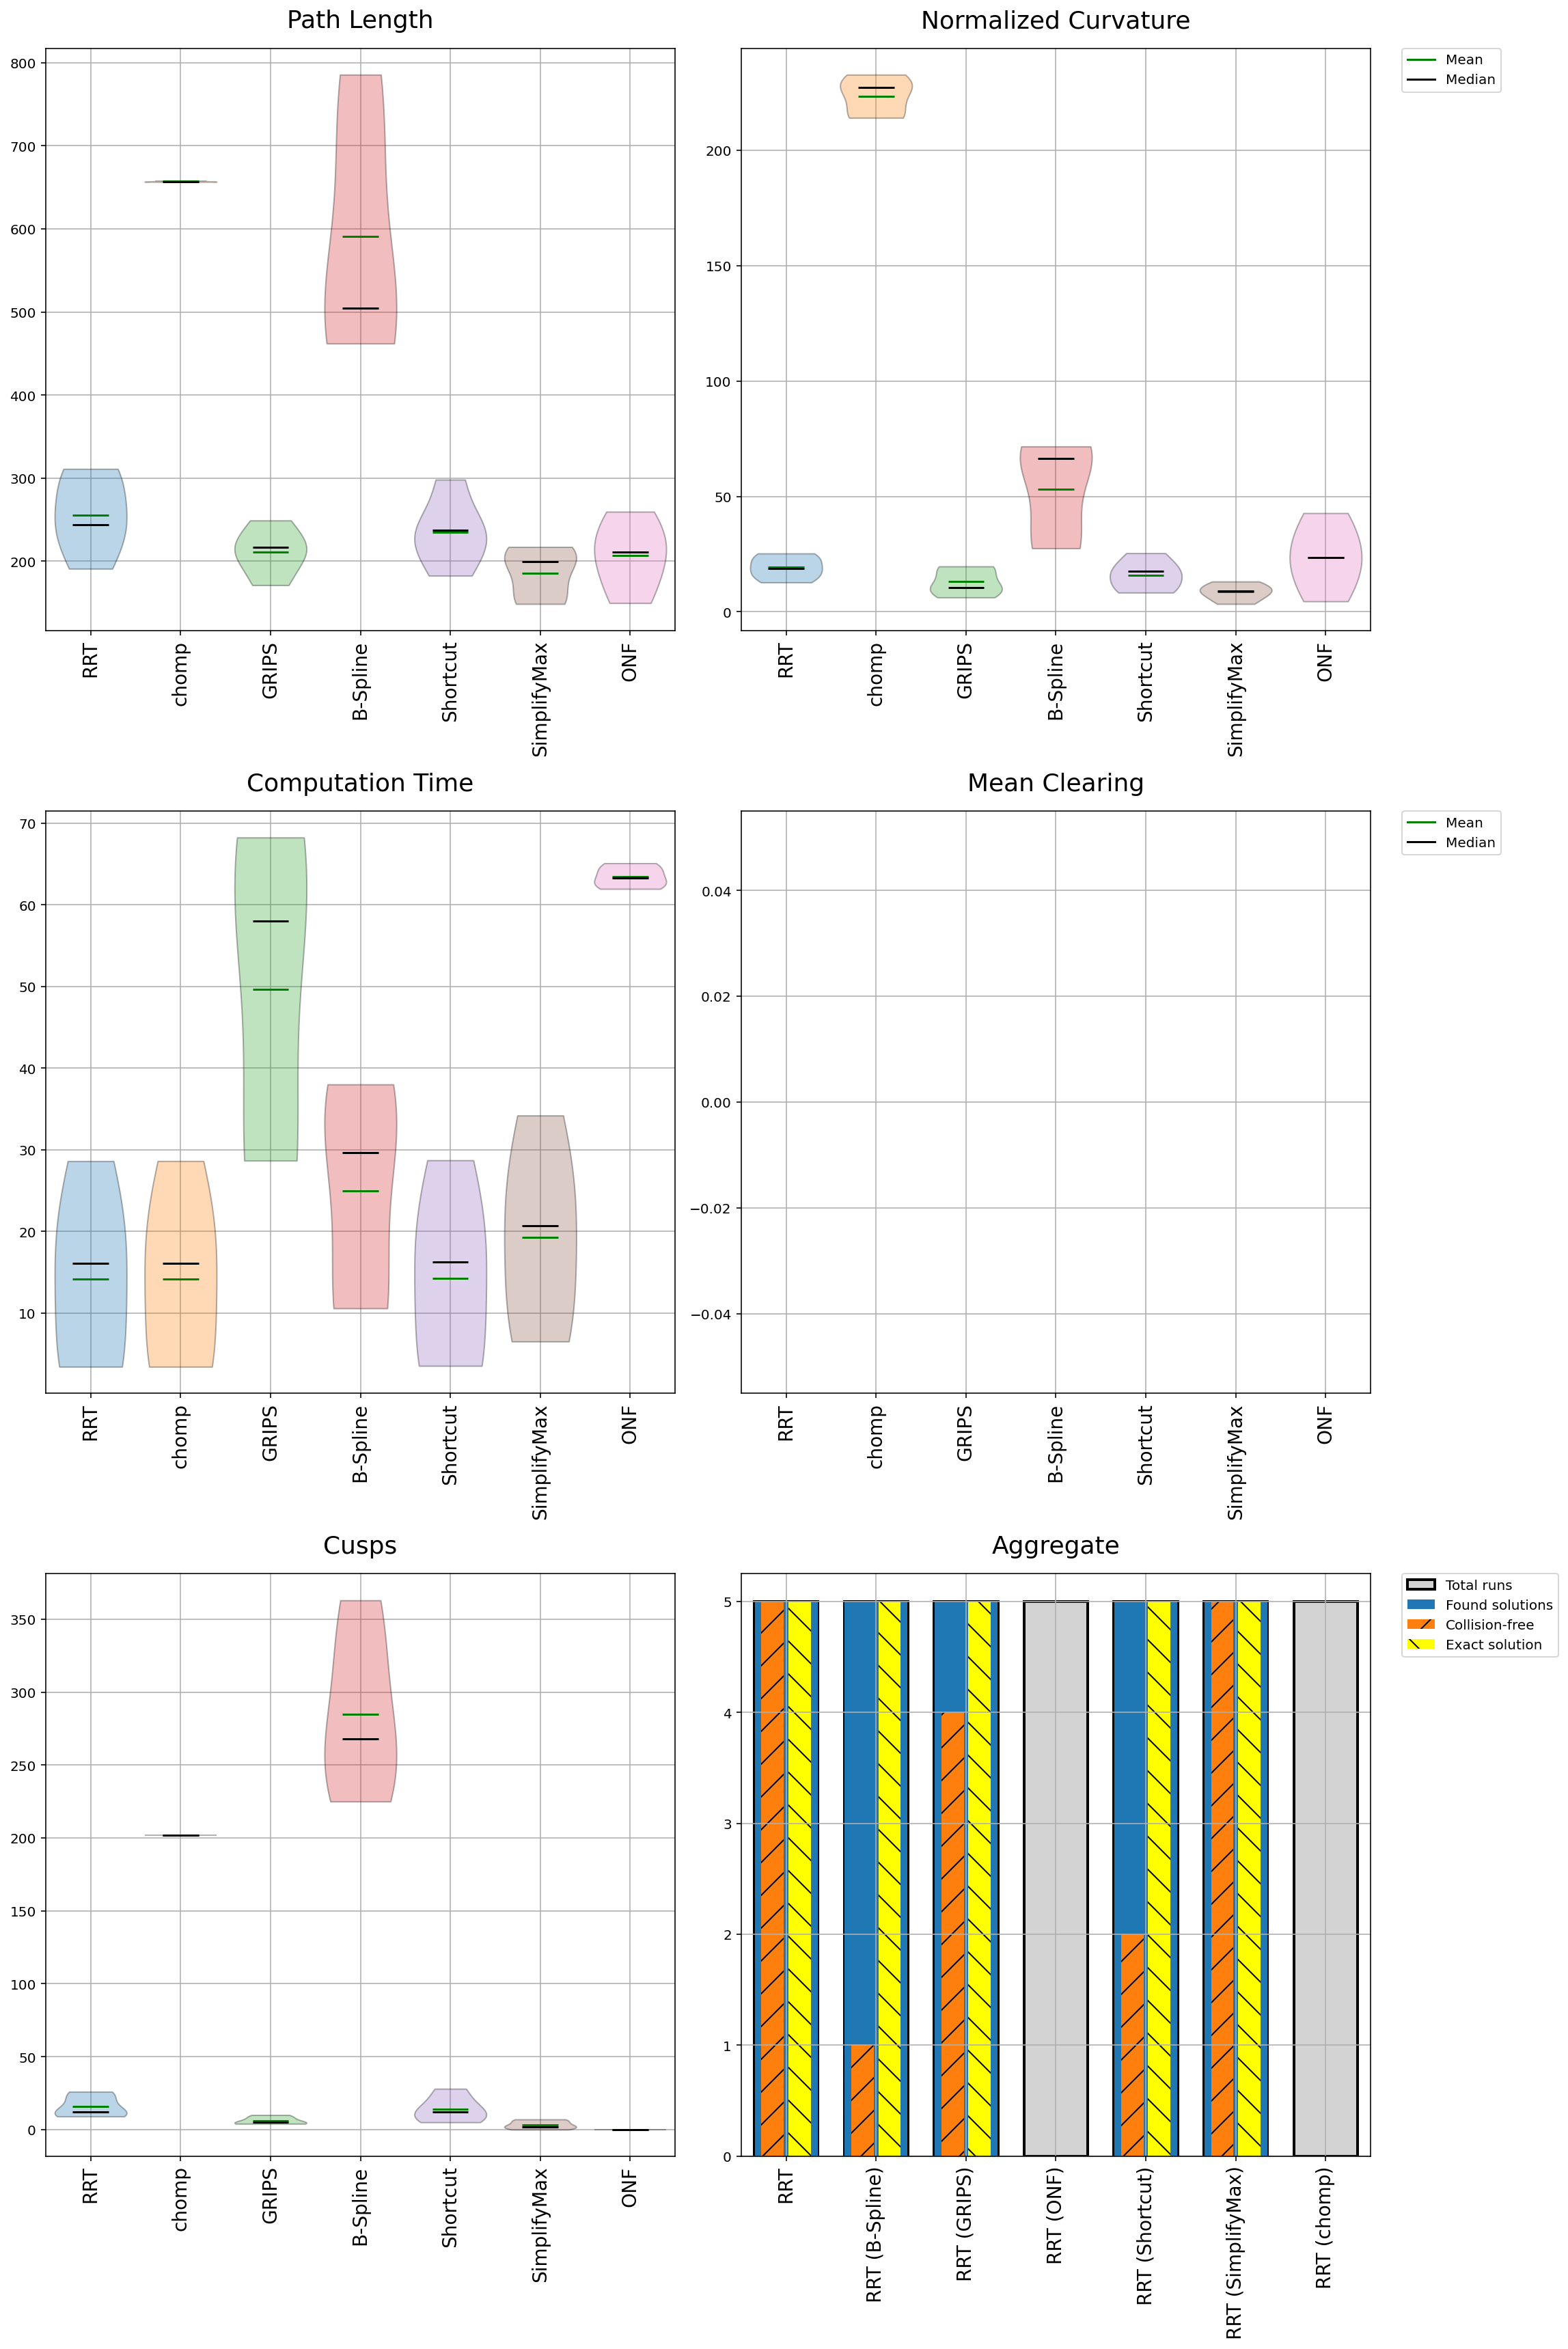

In [5]:
m.plot_smoother_stats(draw_start_goal_thetas=True,
                      plot_every_nth_polygon=8,
                      fig_width=8,
                      fig_height=8,
                      silence=True,
                      save_file="plots/onf_smoother_stats.pdf",
                      num_colors=10,
                      show_smoother=True)